<a href="https://colab.research.google.com/github/Teacher-Heiko/fastbook/blob/master/Display_feature_map_1_conv_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

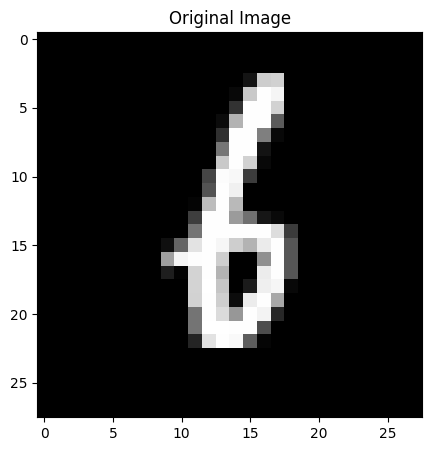

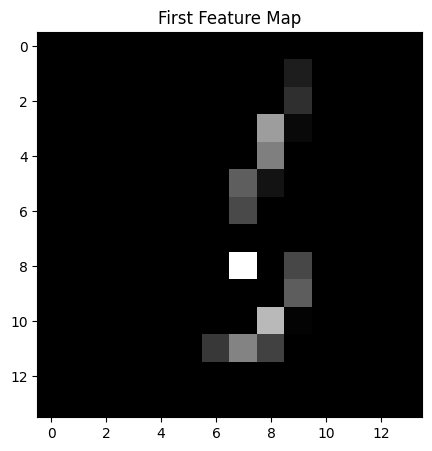

In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Define the convolution function
def conv(ni, nf, ks=3, act=True):
    res = nn.Conv2d(ni, nf, stride=2, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

# Define the imshow function
def imshow(img, cmap='gray', title=None):
    if img.requires_grad:
        img = img.detach()
    img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
    npimg = img.numpy()
    plt.figure(figsize=(5, 5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap=cmap)
    if title is not None:
        plt.title(title)
    plt.show()

# Download and prepare the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


# Define the simple CNN model
def simple_cnn():
    return nn.Sequential(
        conv(1, 4)  # 1 input channel, 4 output channels
    )

model = simple_cnn()

# Get a batch of data and pass it through the model
images, labels = next(iter(dataloader))
feature_maps = model(images)

# Display the first input image
imshow(images[0], cmap='gray', title='Original Image')

# Display the first feature map (from the first image and first channel)
first_feature_map = feature_maps[0, 0].unsqueeze(0)
imshow(first_feature_map, cmap='gray', title='First Feature Map')

